### K Means Clustering

First 5 rows of the dataset:
         date        Open        High         Low       Close   Adj Close  \
0  2018-01-02  196.100006  201.649994  195.419998  201.070007  201.070007   
1  2018-01-03  202.050003  206.210007  201.500000  205.050003  205.050003   
2  2018-01-04  206.199997  207.050003  204.000000  205.630005  205.630005   
3  2018-01-05  207.250000  210.020004  205.589996  209.990005  209.990005   
4  2018-01-08  210.020004  212.500000  208.440002  212.050003  212.050003   

     Volume    P_mean  P_sum  twt_count  
0  10966900  0.020833     10        480  
1   8591400  0.071217     24        337  
2   6029600 -0.018519     -4        216  
3   7033200 -0.019737     -6        304  
4   5580200 -0.007663     -2        261  

Missing values in the dataset:
date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
P_mean       0
P_sum        0
twt_count    0
dtype: int64

Clustered data with labels:
         Open        High       

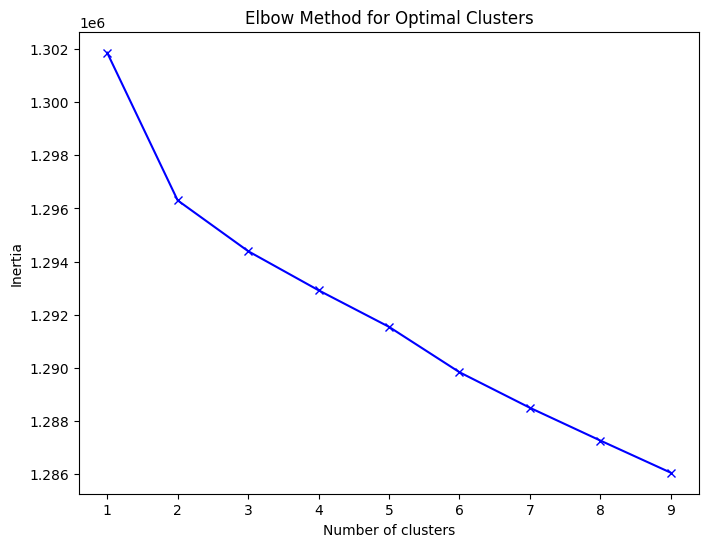

In [16]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Final_nflx_data_2018-2022.csv'
data = pd.read_csv(file_path)

# Inspect the dataset
print("First 5 rows of the dataset:")
print(data.head())

# Check for missing values
print("\nMissing values in the dataset:")
print(data.isnull().sum())

# Dropping any rows with missing values (if any)
data_clean = data.dropna()

# Drop non-numeric columns (e.g., 'Date' or other categorical data)
# You can specify the columns to drop based on your dataset, here I drop 'Date' as an example
if 'Date' in data_clean.columns:
    data_clean = data_clean.drop(columns=['Date'])

# Convert categorical columns to numeric using one-hot encoding (if necessary)
data_clean = pd.get_dummies(data_clean, drop_first=True)

# Standardizing the dataset (K-Means requires scaling)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_clean)

# Perform K-Means clustering with an arbitrary number of clusters (e.g., 3)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original data
data_clean['Cluster'] = kmeans.labels_

# Inspect the resulting clustered data
print("\nClustered data with labels:")
print(data_clean.head())

# Visualizing the Elbow Method to find the optimal number of clusters
inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Clusters')
plt.show()


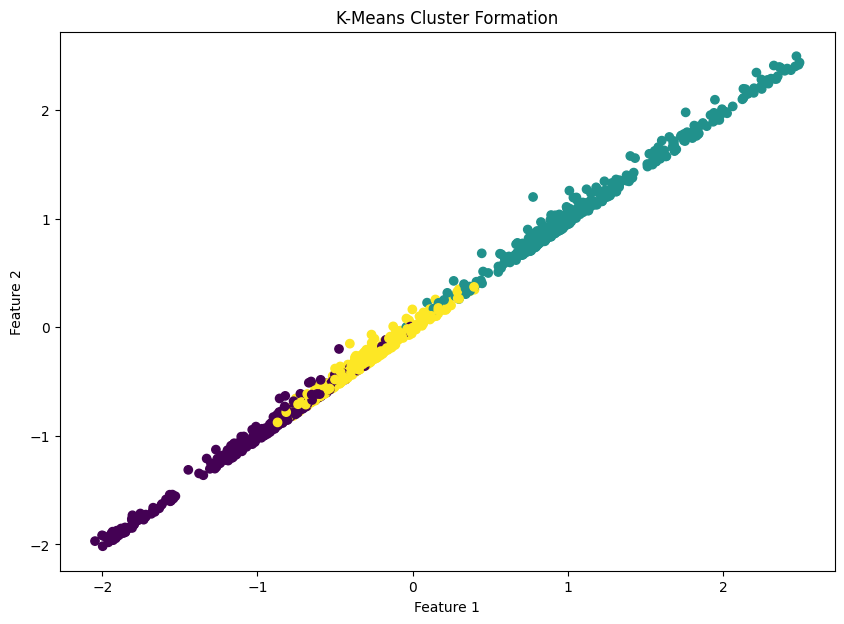

In [17]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv(file_path)

# Dropping any rows with missing values (if any)
data_clean = data.dropna()

# Drop non-numeric columns (e.g., 'Date' or other categorical data)
if 'Date' in data_clean.columns:
    data_clean = data_clean.drop(columns=['Date'])

# Convert categorical columns to numeric using one-hot encoding (if necessary)
data_clean = pd.get_dummies(data_clean, drop_first=True)

# Standardizing the dataset (K-Means requires scaling)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_clean)

# Perform K-Means clustering with an arbitrary number of clusters (e.g., 3)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original data
data_clean['Cluster'] = kmeans.labels_

# Choose two features to plot (you can change these to any numeric columns)
# For demonstration, let's take the first two columns of scaled data
plt.figure(figsize=(10, 7))

# Scatter plot with clusters
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=kmeans.labels_, cmap='viridis')

# Labels and title
plt.title('K-Means Cluster Formation')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Show plot
plt.show()


### K Medoid Clustering

In [18]:
import pandas as pd

try:
  df = pd.read_csv(file_path)
  print("Data loaded successfully!")
except FileNotFoundError:
  print(f"File not found at path: {file_path}")
except Exception as e:
  print(f"An error occurred: {e}")

Data loaded successfully!


In [19]:
!pip install scikit-learn-extra 

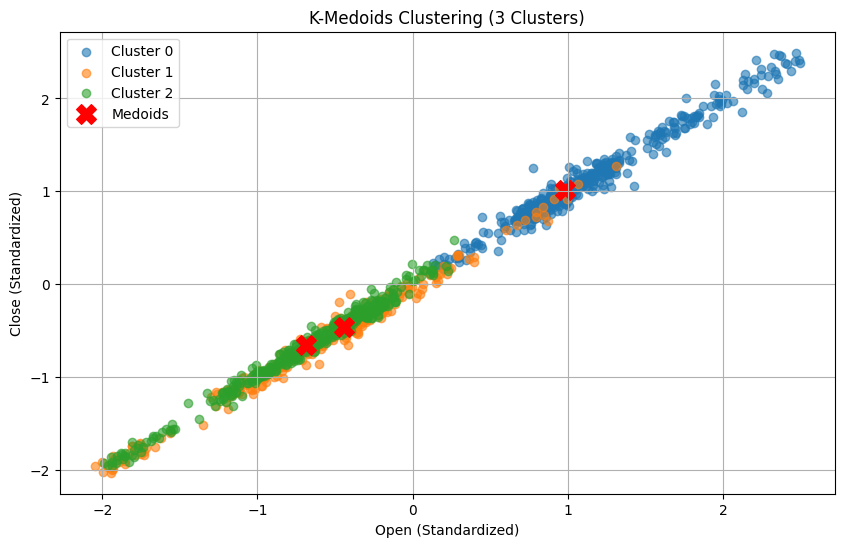

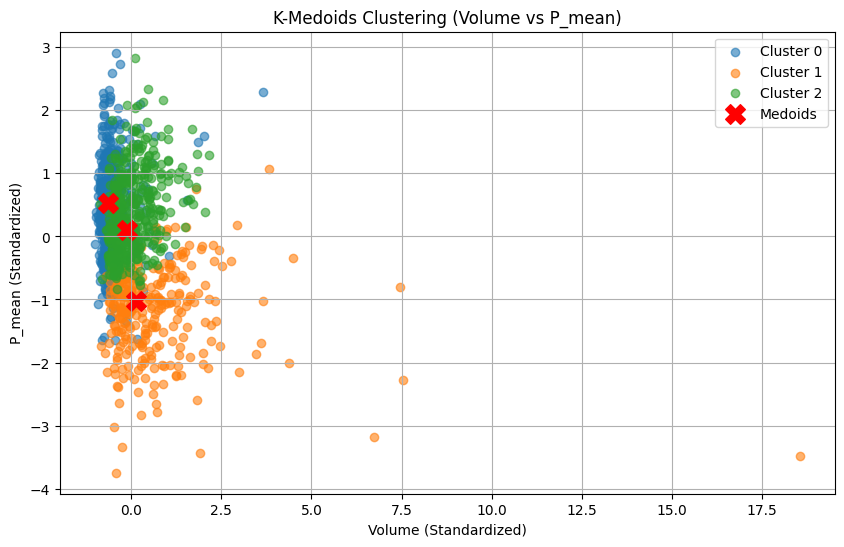

In [27]:
from sklearn_extra.cluster import KMedoids
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Selecting relevant features for clustering
features = df[['Open', 'Close', 'Volume', 'P_mean', 'twt_count']]

# Standardizing the features for better clustering performance
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Applying the K-Medoids algorithm with 3 clusters for demonstration
kmedoids = KMedoids(n_clusters=3, random_state=42)
kmedoids.fit(scaled_features)

# Assigning cluster labels to the dataset
df['Cluster'] = kmedoids.labels_

# Visualizing the clusters using a scatter plot for two selected features (e.g., 'Open' and 'Close')
plt.figure(figsize=(10, 6))
for cluster in range(3):
    cluster_data = scaled_features[kmedoids.labels_ == cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster}', alpha=0.6)

# Plotting medoids
medoid_indices = kmedoids.medoid_indices_
plt.scatter(scaled_features[medoid_indices, 0], scaled_features[medoid_indices, 1],
            s=200, c='red', marker='X', label='Medoids')

plt.title('K-Medoids Clustering (3 Clusters)')
plt.xlabel('Open (Standardized)')
plt.ylabel('Close (Standardized)')
plt.legend()
plt.grid(True)
plt.show()

# Visualizing another pair of features (e.g., 'Volume' and 'P_mean')
plt.figure(figsize=(10, 6))
for cluster in range(3):
    cluster_data = scaled_features[kmedoids.labels_ == cluster]
    plt.scatter(cluster_data[:, 2], cluster_data[:, 3], label=f'Cluster {cluster}', alpha=0.6)

# Plotting medoids for the second visualization
plt.scatter(scaled_features[medoid_indices, 2], scaled_features[medoid_indices, 3],
            s=200, c='red', marker='X', label='Medoids')

plt.title('K-Medoids Clustering (Volume vs P_mean)')
plt.xlabel('Volume (Standardized)')
plt.ylabel('P_mean (Standardized)')
plt.legend()
plt.grid(True)
plt.show()


### DBSCAN

In [23]:
import pandas as pd

# Assuming the file is in your Google Drive, replace 'path/to/your/file.csv' with the actual path
file_path = 'Final_nflx_data_2018-2022 (1).csv'

try:
  data = pd.read_csv(file_path)
  print("Data loaded successfully!")
except FileNotFoundError:
  print(f"File not found at path: {file_path}")
except Exception as e:
  print(f"An error occurred: {e}")

File not found at path: Final_nflx_data_2018-2022 (1).csv


In [24]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

def euclidean_distance(point1, point2):
  """Calculates the Euclidean distance between two points."""
  return np.sqrt(np.sum((point1 - point2)**2))

def dbscan(data, eps, min_pts):
  """Performs DBSCAN clustering without using built-in functions.

  Args:
    data: A NumPy array or Pandas DataFrame representing the dataset.
    eps: The radius of the neighborhood.
    min_pts: The minimum number of points required to form a dense region.

  Returns:
    A list of cluster assignments for each point (e.g., [0, 1, 1, 0, 2, ...]).
  """
  n_points = data.shape[0]
  labels = np.array([-1] * n_points)  # Initialize all points as noise (-1)
  cluster_id = 0

  for point_idx in range(n_points):
    if labels[point_idx] != -1:
      continue

    neighbors = []
    for other_idx in range(n_points):
      if point_idx != other_idx:
        distance = euclidean_distance(data[point_idx], data[other_idx])
        if distance <= eps:
          neighbors.append(other_idx)

    if len(neighbors) < min_pts:
      labels[point_idx] = -1  # Mark as noise
    else:
      cluster_id += 1
      labels[point_idx] = cluster_id
      seed_set = neighbors
      i = 0
      while i < len(seed_set):
        neighbor_idx = seed_set[i]
        if labels[neighbor_idx] == -1:
          labels[neighbor_idx] = cluster_id
          new_neighbors = []
          for other_idx in range(n_points):
            if neighbor_idx != other_idx:
              distance = euclidean_distance(data[neighbor_idx], data[other_idx])
              if distance <= eps:
                new_neighbors.append(other_idx)
          if len(new_neighbors) >= min_pts:
            seed_set.extend(new_neighbors)
        elif labels[neighbor_idx] == 0:
          labels[neighbor_idx] = cluster_id
        i += 1
  return labels


# Example usage with your DataFrame (assuming 'df' is defined)
# Select the numerical features you want to use for clustering
selected_features = df[['Open', 'High', 'Low', 'Close', 'Volume']]

# Standardize the data (important for DBSCAN)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(selected_features)

# Apply DBSCAN with chosen parameters
eps = 0.5  # Adjust this based on your data and desired density
min_pts = 5  # Adjust this based on your data and desired density
cluster_labels = dbscan(scaled_data, eps, min_pts)

# Add the cluster labels to the DataFrame
df['Cluster'] = cluster_labels

# Display the clustering results
print(df[['Open', 'High', 'Low', 'Close', 'Volume', 'Cluster']])


            Open        High         Low       Close    Volume  Cluster
0     196.100006  201.649994  195.419998  201.070007  10966900        1
1     202.050003  206.210007  201.500000  205.050003   8591400        1
2     206.199997  207.050003  204.000000  205.630005   6029600        1
3     207.250000  210.020004  205.589996  209.990005   7033200        1
4     210.020004  212.500000  208.440002  212.050003   5580200        1
...          ...         ...         ...         ...       ...      ...
1132  176.490005  180.100006  174.270004  179.949997   5194700        1
1133  176.279999  185.919998  172.679993  185.880005   7334300        1
1134  185.199997  186.220001  180.820007  184.059998   5753400        1
1135  184.270004  190.210007  183.500000  189.270004   6334500        1
1136  186.020004  189.910004  182.750000  186.979996   5831300        1

[1137 rows x 6 columns]


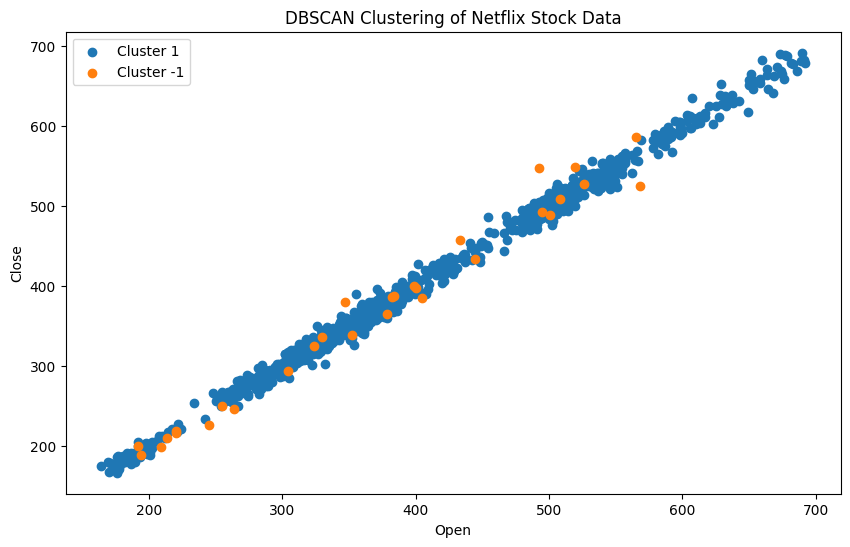

In [25]:
# prompt: show in scatter plot

import matplotlib.pyplot as plt

# Assuming df and cluster_labels are already defined

# Choose two features to plot (e.g., 'Open' and 'Close')
x_feature = 'Open'
y_feature = 'Close'

# Create a scatter plot, coloring points by their cluster assignment
plt.figure(figsize=(10, 6))
for cluster_id in df['Cluster'].unique():
  cluster_data = df[df['Cluster'] == cluster_id]
  plt.scatter(cluster_data[x_feature], cluster_data[y_feature], label=f'Cluster {cluster_id}')

plt.xlabel(x_feature)
plt.ylabel(y_feature)
plt.title('DBSCAN Clustering of Netflix Stock Data')
plt.legend()
plt.show()

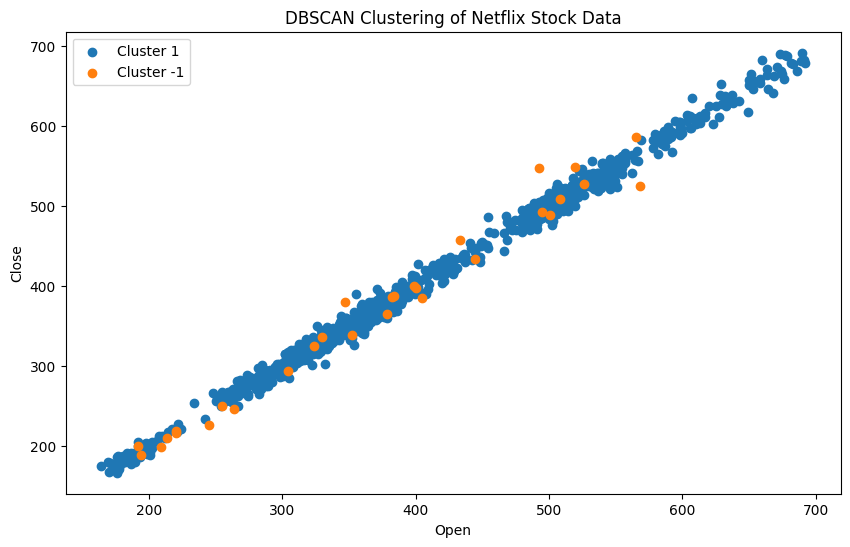

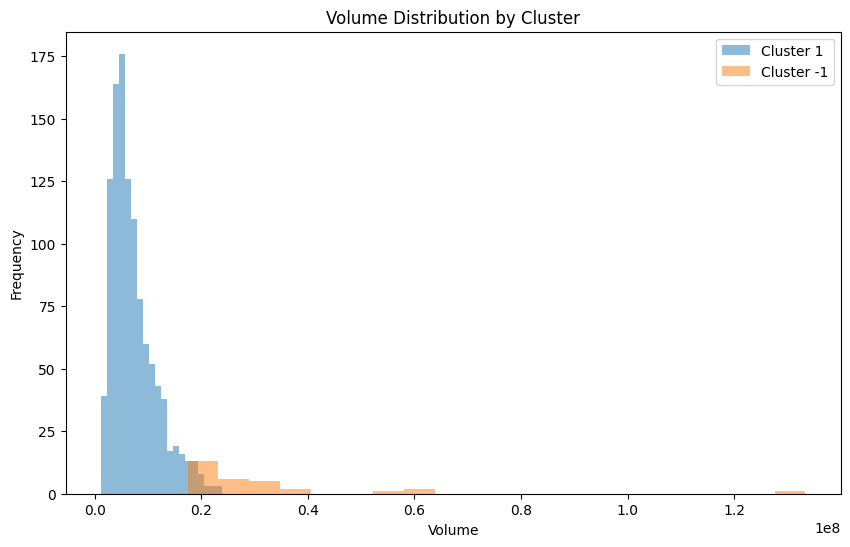

<Figure size 1000x600 with 0 Axes>

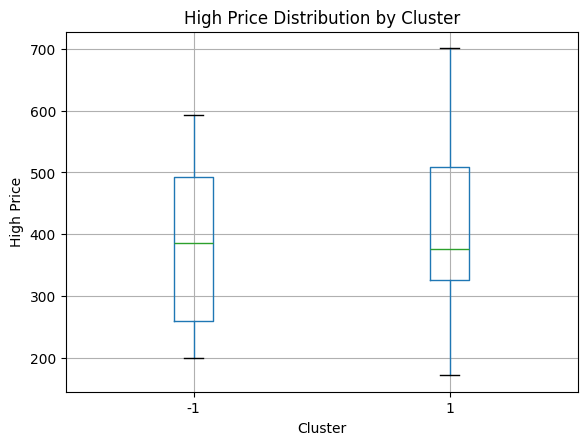

In [26]:
# Choose two features to plot (e.g., 'Open' and 'Close')
x_feature = 'Open'
y_feature = 'Close'

# Create a scatter plot, coloring points by their cluster assignment
plt.figure(figsize=(10, 6))
for cluster_id in df['Cluster'].unique():
  cluster_data = df[df['Cluster'] == cluster_id]
  plt.scatter(cluster_data[x_feature], cluster_data[y_feature], label=f'Cluster {cluster_id}')

plt.xlabel(x_feature)
plt.ylabel(y_feature)
plt.title('DBSCAN Clustering of Netflix Stock Data')
plt.legend()
plt.show()


# Add more graphs (e.g., histograms of features for each cluster)

# Histogram of 'Volume' for each cluster
plt.figure(figsize=(10, 6))
for cluster_id in df['Cluster'].unique():
  cluster_data = df[df['Cluster'] == cluster_id]
  plt.hist(cluster_data['Volume'], bins=20, alpha=0.5, label=f'Cluster {cluster_id}')

plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.title('Volume Distribution by Cluster')
plt.legend()
plt.show()


# Boxplot of 'High' for each cluster
plt.figure(figsize=(10, 6))
df.boxplot(column='High', by='Cluster')
plt.title('High Price Distribution by Cluster')
plt.suptitle('')  # Remove the default title
plt.xlabel('Cluster')
plt.ylabel('High Price')
plt.show()


# You can add more graphs as needed, like:
# - Line plots of 'Close' price over time for each cluster
# - Scatter plots of different feature combinations
# - Bar charts of the number of data points in each cluster
# - ...

### Agglomerative Clustering

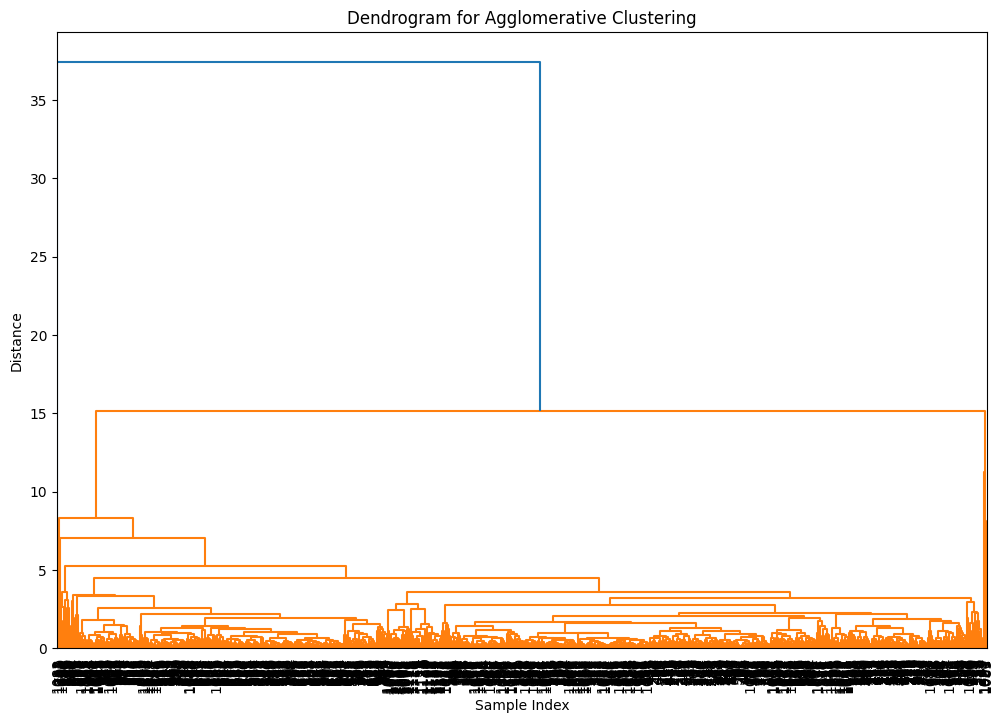

Merging clusters (821, 828) - Remaining clusters: 1136
Merging clusters (177, 374) - Remaining clusters: 1135
Merging clusters (747, 752) - Remaining clusters: 1134
Merging clusters (897, 906) - Remaining clusters: 1133
Merging clusters (88, 89) - Remaining clusters: 1132
Merging clusters (158, 194) - Remaining clusters: 1131
Merging clusters (5, 6) - Remaining clusters: 1130
Merging clusters (404, 420) - Remaining clusters: 1129
Merging clusters (557, 1122) - Remaining clusters: 1128
Merging clusters (411, 413) - Remaining clusters: 1127
Merging clusters (1084, 1085) - Remaining clusters: 1126
Merging clusters (85, 90) - Remaining clusters: 1125


KeyboardInterrupt: 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

def euclidean_distance(point1, point2):
    """Calculate the Euclidean distance between two points."""
    return np.sqrt(np.sum((point1 - point2) ** 2))

def calculate_distance_matrix(data):
    """Calculate the distance matrix for the dataset."""
    n_samples = data.shape[0]
    distance_matrix = np.zeros((n_samples, n_samples))
    for i in range(n_samples):
        for j in range(i + 1, n_samples):
            distance = euclidean_distance(data[i], data[j])
            distance_matrix[i, j] = distance_matrix[j, i] = distance
    return distance_matrix

def average_linkage(cluster1, cluster2, data):
    """Calculate the average distance between two clusters."""
    distances = [euclidean_distance(data[i], data[j]) for i in cluster1 for j in cluster2]
    return np.mean(distances)

def agglomerative_clustering(data, n_clusters):
    """Perform Agglomerative Clustering from scratch."""
    n_samples = data.shape[0]
    clusters = [[i] for i in range(n_samples)]  # Each point is its own cluster
    distance_matrix = calculate_distance_matrix(data)
    
    while len(clusters) > n_clusters:
        min_distance = np.inf
        closest_pair = (0, 0)

        # Find the closest pair of clusters
        for i in range(len(clusters)):
            for j in range(i + 1, len(clusters)):
                dist = average_linkage(clusters[i], clusters[j], data)
                if dist < min_distance:
                    min_distance = dist
                    closest_pair = (i, j)

        # Merge the closest clusters
        new_cluster = clusters[closest_pair[0]] + clusters[closest_pair[1]]
        clusters.append(new_cluster)
        clusters.pop(max(closest_pair))
        clusters.pop(min(closest_pair))
        
        # Add debug print to monitor the process
        print(f"Merging clusters {closest_pair} - Remaining clusters: {len(clusters)}")
        
    return clusters

def plot_dendrogram(data):
    """Plot a dendrogram for the hierarchical clustering."""
    Z = linkage(data, method='average')  # Using average linkage for dendrogram
    plt.figure(figsize=(12, 8))
    plt.title('Dendrogram for Agglomerative Clustering')
    dendrogram(Z, leaf_rotation=90, leaf_font_size=10)
    plt.xlabel('Sample Index')
    plt.ylabel('Distance')
    plt.show()

def perform_agglomerative_clustering(file_path, n_clusters, drop_columns=None):
    data = pd.read_csv(file_path)
    data_numeric = data.drop(columns=drop_columns) if drop_columns else data
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data_numeric)
    plot_dendrogram(data_scaled)
    clusters = agglomerative_clustering(data_scaled, n_clusters)
    labels = np.zeros(data.shape[0])
    for cluster_id, cluster in enumerate(clusters):
        for index in cluster:
            labels[index] = cluster_id
    data['Cluster'] = labels
    sns.pairplot(data, hue='Cluster', palette='Set1')
    plt.show()
    return data

# Example usage
file_path = 'Final_nflx_data_2018-2022.csv'
n_clusters = 3
drop_columns = ['date']
clustered_data = perform_agglomerative_clustering(file_path, n_clusters, drop_columns)
